<a href="https://colab.research.google.com/github/fasyamp/ML_CaseBased2/blob/main/ML_CaseBased2_Without_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Raden Fasya Mazaya Putri

NIM   : 1301200390

Kelas : IF-44-03

Mata Kuliah : Machine Learning



---



**Clustering the Countries by using Unsupervised Learning for HELP International**

**Tujuan**:
Untuk mengkategorikan negara-negara dengan menggunakan faktor sosio-ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan.

**Goals** : Meng-kategorikan negara-negara tersebut menggunakan beberapa faktor sosial-ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian menyarankan negara-negara yang paling perlu difokuskan oleh perusahaan.

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

# **Import File**

In [ ]:
countrydata = pd.read_csv('https://raw.githubusercontent.com/fasyamp/ML_CaseBased2/main/Country-data.csv')
datadict = pd.read_csv('https://raw.githubusercontent.com/fasyamp/ML_CaseBased2/main/data-dictionary.csv')

# **Isi dari file Data Dictionary**



In [ ]:
# Menampilkan isi dari datadict
for i in range(len(datadict['Column Name'])):
    print(datadict['Column Name'][i],'\n\t',datadict['Description'][i])

country 
	 Name of the country
child_mort 
	 Death of children under 5 years of age per 1000 live births
exports 
	 Exports of goods and services per capita. Given as %age of the GDP per capita
health 
	 Total health spending per capita. Given as %age of GDP per capita
imports 
	 Imports of goods and services per capita. Given as %age of the GDP per capita
Income 
	 Net income per person
Inflation 
	 The measurement of the annual growth rate of the Total GDP
life_expec 
	 The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer 
	 The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp 
	 The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
# Menampilkan isi dari countrydata
countrydata

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


##**Info dari Country Data**

In [ ]:
list(countrydata.columns)

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [ ]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
countrydata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#**Preprocessing**
Pada tahap ini dilakukan pengolahan data agar data tersebut siap untuk diolah lebih dalam.

In [ ]:
# Cek apakah terdapat data 0
countrydata.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
data = countrydata.drop(['country'],axis=1)

In [ ]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


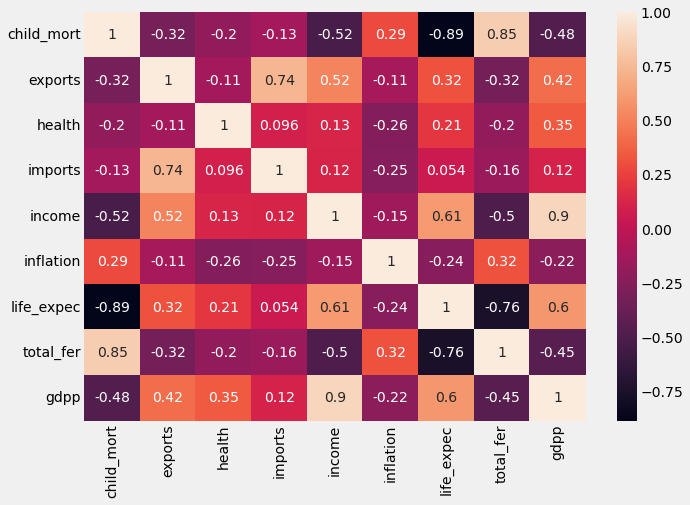

In [ ]:
# Korelasi Antar Data
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

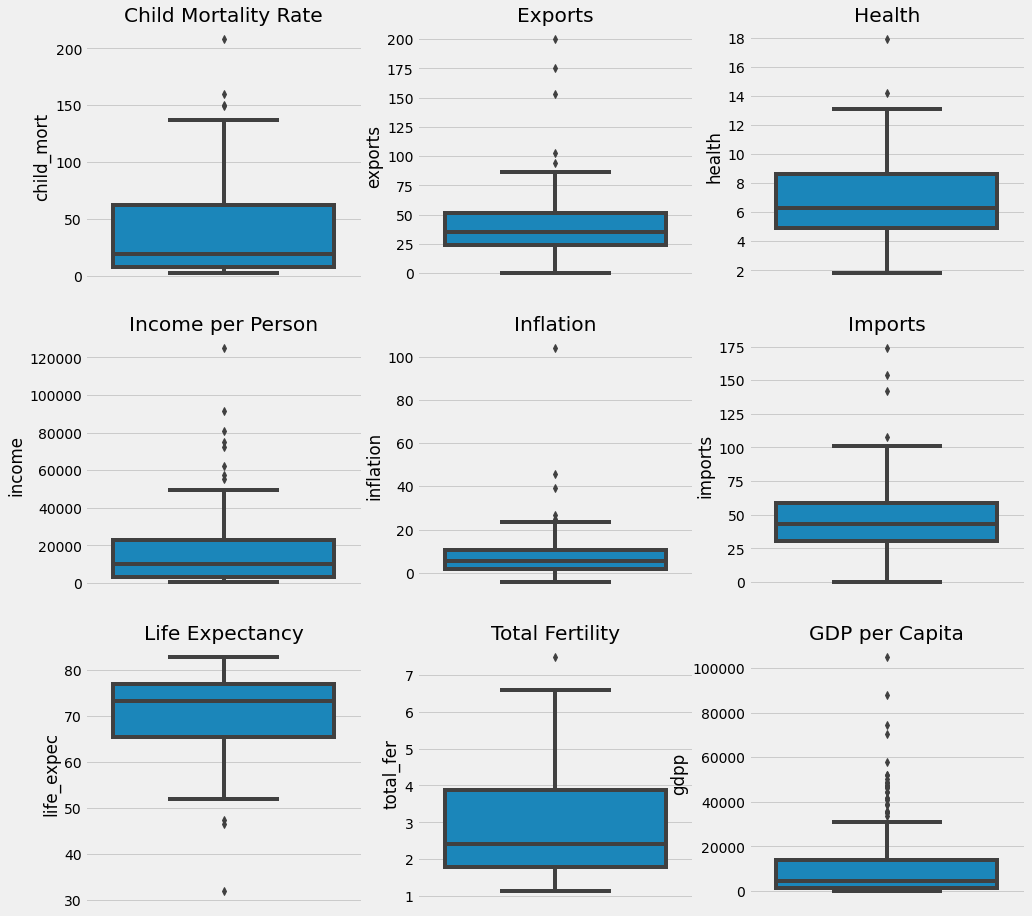

In [ ]:
#Box Plotting
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=data.exports,ax=ax[0,1])
ax[0, 1].set_title('Exports')
bp=sns.boxplot(y=data.health,ax=ax[0, 2])
ax[0, 2].set_title('Health')
bp=sns.boxplot(y=data.income,ax=ax[1, 0])
ax[1, 0].set_title('Income per Person')
bp=sns.boxplot(y=data.inflation,ax=ax[1, 1])
ax[1, 1].set_title('Inflation')
bp=sns.boxplot(y=data.imports,ax=ax[1,2])
ax[1, 2].set_title('Imports')
s=sns.boxplot(y=data.life_expec,ax=ax[2, 0])
ax[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=ax[2,1])
ax[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=ax[2, 2])
ax[2, 2].set_title('GDP per Capita')

plt.show()

##**Scalling**

In [ ]:
# columns argument ==> akan digunakan pada saat ubah data ke dataframe
columns = data.columns

# Melakukan scalling menggunakan MinMaxScaller
scaler = MinMaxScaler()

# 'scaler' adalah teknik scalling, 'fit' function untuk menemukan nilai min dan max, 'transform' function mengaplikasikan formula ke semua elemen dalam data
rescaled_data = scaler.fit_transform(data)
rescaled_data

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [ ]:
#Ubah kembali menjadi DataFrame

data_minmax = pd.DataFrame(data= rescaled_data , columns = columns)
data_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


#**KMeans**

##**Elbow Curve Method**

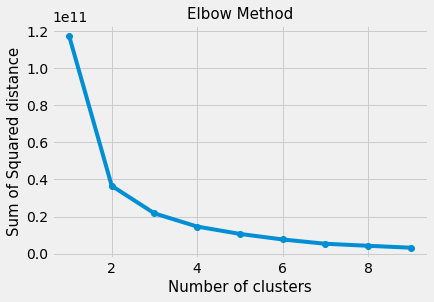

In [ ]:
# Elbow method berfungsi menentukan nilai k yang paling tepat

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

Berdasarkan plot di atas, maka diputuskan bahwa nilai k = 3

##**KMeans Without Library**

In [ ]:
# Jumlah baris dan kolom
data_minmax.shape

(167, 9)

In [ ]:
n = 167   # jumlah baris
p = 2     # jumlah features, descriptors, kolom [dimensi]
k = 3     # nilai k 

In [ ]:
x = data_minmax[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [ ]:
# Mengubah dataframe menjadi array numpy
X_arr = np.array(x)
X_arr

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

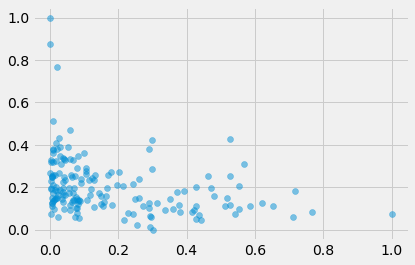

In [ ]:
#Visualisasi scatter plot array
plt.scatter(X_arr[:, 0], X_arr[:, 1], alpha=0.5)
plt.show()

**Langkah membuat algoritma KMeans :**

1. Menentukan sembarang centroid 
2. Menghitung jarak / distance menggunakan euclidean distance
3. Melakukan cluster sesuai nilai k
4. Mengupdate titik centroid yang baru
5. Mengulangi step 3 dan 4 hingga nilai centroid tidak mengalami perubahan

In [ ]:
# Menentukan titik centroid secara sembarang
np.random.seed(seed=0)
centroids = X_arr[np.random.choice(n, k, replace=False)]
centroids

array([[0.42697176, 0.20056431, 0.36295836, 0.32905623, 0.00483154,
        0.04981055, 0.52465483, 0.58675079, 0.00245302],
       [0.37828627, 0.11851959, 0.24114357, 0.2451164 , 0.00844916,
        0.07864338, 0.65877712, 0.7192429 , 0.00315933],
       [0.03115871, 0.31112456, 0.        , 0.13645455, 1.        ,
        0.10341004, 0.93491124, 0.14511041, 0.66879516]])

Euclidean Distance
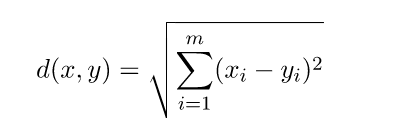

In [ ]:
# Euclidean distance antara satu centroid dan satu titik
((X_arr[0]-centroids[0])**2).sum()**0.5

0.24217577692610337

In [ ]:
# Euclidean distance antara centroid 1 dengan seluruh data
((X_arr-centroids[0])**2).sum(axis=1)**0.5

array([0.24217578, 0.72466105, 0.64279301, 0.4587809 , 0.71416842,
       0.73191725, 0.72067999, 1.00171001, 1.00622904, 0.64201076,
       0.74793306, 0.80705649, 0.61542419, 0.73384071, 0.75014536,
       0.96627023, 0.57923803, 0.29777746, 0.55772009, 0.48339769,
       0.8147219 , 0.39266874, 0.75461092, 1.08886631, 0.72978423,
       0.2882562 , 0.39354507, 0.43610534, 0.26990672, 1.00441083,
       0.58664634, 0.48680883, 0.4544378 , 0.77820376, 0.75965593,
       0.72339456, 0.27283045, 0.34747714, 0.45448183, 0.79190801,
       0.22045189, 0.7849021 , 0.90297726, 0.83501344, 1.02544637,
       0.58764811, 0.61845966, 0.54756361, 0.62748795, 0.4972611 ,
       0.45763891, 0.79417417, 0.53351182, 0.94201645, 0.95298963,
       0.44903122, 0.25956544, 0.67426941, 0.99185958, 0.26466803,
       0.90397062, 0.63384152, 0.46310698, 0.26568821, 0.23041036,
       0.49892653, 0.82682118, 0.83115512, 0.9179651 , 0.5171873 ,
       0.65851803, 0.75230327, 0.38526821, 1.01692232, 0.78349

In [ ]:
# Euclidean distance antara centroid 2 dengan seluruh data
((X_arr-centroids[1])**2).sum(axis=1)**0.5

array([0.23927367, 0.74943033, 0.59280415, 0.38739765, 0.73366951,
       0.720394  , 0.72636427, 0.99565156, 1.05588072, 0.68219535,
       0.7885878 , 0.82041793, 0.59251515, 0.77403722, 0.80383375,
       1.0309686 , 0.60789351, 0.20610507, 0.60321669, 0.46220918,
       0.88419385, 0.54517639, 0.77290719, 1.07346309, 0.7817654 ,
       0.25361069, 0.42635292, 0.51226444, 0.25165049, 1.03385139,
       0.58698865, 0.51787693, 0.41924198, 0.78962262, 0.75794191,
       0.72216431, 0.18407242, 0.35167202, 0.44065184, 0.82661071,
       0.28083469, 0.81780521, 0.92405767, 0.89107443, 1.06819971,
       0.57867232, 0.61990954, 0.50026782, 0.64882846, 0.5242415 ,
       0.33489744, 0.84316196, 0.59515137, 0.96067837, 0.97773529,
       0.41533199, 0.        , 0.74828327, 1.04018925, 0.26771348,
       0.93186015, 0.65407667, 0.4525072 , 0.24498074, 0.33223862,
       0.58417722, 0.9925258 , 0.91200949, 0.93571779, 0.52216675,
       0.61935614, 0.74606104, 0.37147629, 1.07976979, 0.75293

In [ ]:
# Euclidean distance antara centroid 3 dengan seluruh data
((X_arr-centroids[2])**2).sum(axis=1)**0.5

array([1.535181  , 1.18404156, 1.13139652, 1.48621275, 1.07446935,
       1.13360273, 1.19132764, 0.84806297, 0.91901755, 1.13160158,
       1.01497694, 0.86498174, 1.24459848, 1.11175752, 1.14077076,
       0.95698951, 1.18580381, 1.45788803, 1.22845715, 1.22049844,
       1.28721851, 1.27752759, 1.18095364, 0.50598204, 1.13877816,
       1.54381311, 1.63947389, 1.27614805, 1.46295006, 0.94446864,
       1.20633915, 1.62254834, 1.63116949, 1.08869377, 1.1597866 ,
       1.18578551, 1.39073389, 1.61121704, 1.35111873, 1.22778519,
       1.47498434, 1.08540678, 0.89438852, 1.02274415, 0.90125825,
       1.17078933, 1.20737207, 1.19213017, 1.21387407, 1.2379638 ,
       1.36119288, 1.05316901, 1.21749584, 0.86297245, 1.00616942,
       1.19178543, 1.43537016, 1.28398106, 0.96856672, 1.35264301,
       1.05089015, 1.16222131, 1.24149873, 1.48267005, 1.53947797,
       1.2598543 , 1.86841733, 1.10781661, 0.89150794, 1.25181894,
       1.17818066, 1.11005919, 1.27821661, 0.91676481, 0.95452

In [ ]:
# Distances = membuat / menyiapkan array sesuai dengan jumlah kolom dan jumlah cluster
distances = np.zeros((n,k))
distances

In [ ]:
# Menghitung distances antara data dengan masing-masing cluster
distances = np.zeros((n,k))
for i in range(k):
    distances[:,i] = ((X_arr-centroids[i])**2).sum(axis=1)**0.5
distances

array([[0.24217578, 0.23927367, 1.535181  ],
       [0.72466105, 0.74943033, 1.18404156],
       [0.64279301, 0.59280415, 1.13139652],
       [0.4587809 , 0.38739765, 1.48621275],
       [0.71416842, 0.73366951, 1.07446935],
       [0.73191725, 0.720394  , 1.13360273],
       [0.72067999, 0.72636427, 1.19132764],
       [1.00171001, 0.99565156, 0.84806297],
       [1.00622904, 1.05588072, 0.91901755],
       [0.64201076, 0.68219535, 1.13160158],
       [0.74793306, 0.7885878 , 1.01497694],
       [0.80705649, 0.82041793, 0.86498174],
       [0.61542419, 0.59251515, 1.24459848],
       [0.73384071, 0.77403722, 1.11175752],
       [0.75014536, 0.80383375, 1.14077076],
       [0.96627023, 1.0309686 , 0.95698951],
       [0.57923803, 0.60789351, 1.18580381],
       [0.29777746, 0.20610507, 1.45788803],
       [0.55772009, 0.60321669, 1.22845715],
       [0.48339769, 0.46220918, 1.22049844],
       [0.8147219 , 0.88419385, 1.28721851],
       [0.39266874, 0.54517639, 1.27752759],
       [0.

In [ ]:
len(distances)

167

In [ ]:
# Update anggota cluster
# argmin berfungsi mencari index terkecil pada dimensi pertama pada data X
closest = np.argmin(distances, axis=1)
closest

array([1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
X_arr[closest == 0]

In [ ]:
X_arr[closest == 1]

In [ ]:
X_arr[closest == 2]

In [ ]:
# Update centroid terbaru pada cluster ke-1 atau cluster 0
X_arr[closest == 0].mean(axis=0)

array([0.16052601, 0.21249016, 0.3495459 , 0.30373457, 0.10042752,
       0.09274877, 0.74308074, 0.23281096, 0.08017639])

In [ ]:
# Update dan menampilkan seluruh centroids
for i in range(k):
    centroids[i, :] = X_arr[closest == i].mean(axis=0)
centroids

array([[0.16052601, 0.21249016, 0.3495459 , 0.30373457, 0.10042752,
        0.09274877, 0.74308074, 0.23281096, 0.08017639],
       [0.26588832, 0.14174369, 0.20351867, 0.19231854, 0.06550004,
        0.16061806, 0.70311789, 0.45428901, 0.03974293],
       [0.01119766, 0.3236996 , 0.40290412, 0.30498756, 0.42973074,
        0.06950752, 0.95454545, 0.09478061, 0.48969985]])

In [ ]:
# Melakukan testing pada program sebelumnya sekaligus memperlihatkan proses berjalannya looping
np.random.seed(seed=0)
centroids = X_arr[np.random.choice(n, k, replace=False)]
closest = np.zeros(n).astype(int)
z = 1
while True:
    # Menginisiasi closest ke dalam prevClosest
    prevClosest = closest.copy()
    print("Iterasi",z,":")
    print(closest)
    z = z + 1
    for i in range(k):
      distances[:,i] = ((X_arr-centroids[i])**2).sum(axis=1)**0.5
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
        centroids[i, :] = X_arr[closest == i].mean(axis=0)
        
    if all(closest == prevClosest):
        break

Iterasi 1 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Iterasi 2 :
[1 0 1 1 0 1 0 2 2 0 0 0 1 0 0 2 0 1 0 1 0 0 0 2 0 1 0 0 1 2 0 0 1 0 1 1 1
 0 1 0 0 0 2 0 2 1 0 1 0 0 1 0 0 2 0 1 1 0 2 0 0 0 1 1 0 0 0 0 2 0 1 1 1 2
 1 2 1 2 0 1 1 0 2 0 0 0 0 0 0 1 0 2 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 2
 0 1 1 2 1 1 0 0 1 1 0 0 2 0 0 0 1 1 1 0 0 0 2 0 0 0 0 0 0 1 0 1 0 2 2 1 1
 0 1 0 1 0 1 0 1 0 2 0 0 0 0 0 1 0 1 0]
Iterasi 3 :
[1 0 0 1 0 0 0 2 2 0 0 0 1 0 0 2 0 1 0 1 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 1 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 1 1 0 1 2
 0 2 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 1 0 1 2
 2 1 1 2 0 1 0 0 0 1 0 2 2 0 0 1 1 0 1 0 0 1 2 0 2 0 0 2 2 

In [ ]:
def kmeans(X_arr, k):
    # Inisiasi sembarang centroids
    n = X_arr.shape[0]
    centroids = X_arr[np.random.choice(n, k, replace=False)]    
    closest = np.zeros(n).astype(int)
    
    while True:
        prevClosest = closest.copy()
        
        # Update anggota cluster
        for i in range(k):
          distances[:,i] = ((X_arr-centroids[i])**2).sum(axis=1)**0.5
        closest = np.argmin(distances, axis=1)
        
        # Update centroid 
        for i in range(k):
            centroids[i, :] = X_arr[closest == i].mean(axis=0)
            
        # Hentikan function ketika tidak ada perubahan 
        if all(closest == prevClosest):
            break
            
    return closest, centroids

In [ ]:
labels, centroids = kmeans(X_arr, 3)
print(labels)
print(" ")
print(centroids)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 0 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]
 
[[0.09652182 0.20147696 0.27380866 0.26944838 0.09777085 0.10922302
  0.79847255 0.18032426 0.06193426]
 [0.44150332 0.14597042 0.28144675 0.24855348 0.02337632 0.15069832
  0.5383329  0.62148539 0.01398231]
 [0.01118375 0.29177116 0.44172956 0.29575955 0.36332096 0.0623325
  0.94961961 0.0932402  0.40934   ]]


In [ ]:
pd.Series(labels).value_counts()

0    86
1    46
2    35
dtype: int64

##**Visualisasi**

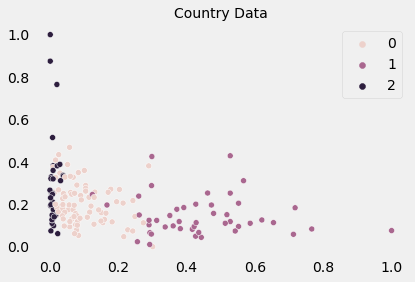

In [ ]:
# Scatter Plot seluruh data kecuali kolom country
sns.scatterplot(X_arr[:,0],X_arr[:,1],hue=labels)
plt.title("Country Data", fontsize=14)
plt.grid()
plt.show()

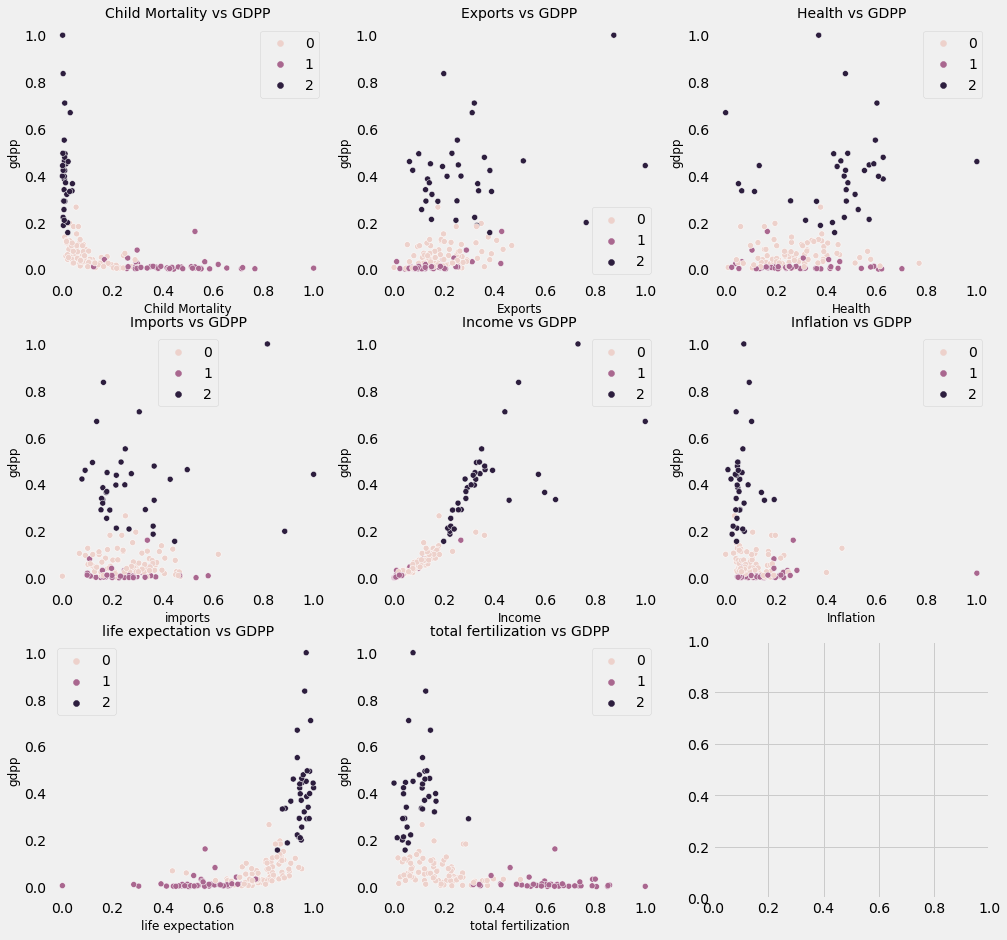

In [ ]:
fig = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))

#Visualisasi antara cluster child mortality dan gdpp
plt.subplot(3,3,1)
sns.scatterplot(data_minmax['child_mort'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Child Mortality vs GDPP", fontsize=14)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()
#plt.show()

#Visualisasi antara cluster exports dan gdpp
plt.subplot(3,3,2)
sns.scatterplot(data_minmax['exports'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Exports vs GDPP", fontsize=14)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()
#plt.show()

#Visualisasi antara cluster health dan gdpp
plt.subplot(3,3,3)
sns.scatterplot(data_minmax['health'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Health vs GDPP", fontsize=14)
plt.xlabel("Health", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster imports dan gdpp
plt.subplot(3,3,4)
sns.scatterplot(data_minmax['imports'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Imports vs GDPP", fontsize=14)
plt.xlabel("imports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster income dan gdpp
plt.subplot(3,3,5)
sns.scatterplot(data_minmax['income'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Income vs GDPP", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster inflation dan gdpp
plt.subplot(3,3,6)
sns.scatterplot(data_minmax['inflation'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("Inflation vs GDPP", fontsize=14)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster life expectation atau ekspetasi lamanya hidup dan gdpp
plt.subplot(3,3,7)
sns.scatterplot(data_minmax['life_expec'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("life expectation vs GDPP", fontsize=14)
plt.xlabel("life expectation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster total fertilization / angka kelahiran dan gdpp
plt.subplot(3,3,8)
sns.scatterplot(data_minmax['total_fer'],data_minmax['gdpp'],hue=labels,data=data_minmax) 
plt.title("total fertilization vs GDPP", fontsize=14)
plt.xlabel("total fertilization", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()



plt.show()

In [ ]:
# Menambahkan list labels ke dalam dataFrame dengan nama Cluster
data_minmax['Cluster'] = labels

In [ ]:
# Memasukkan kembali kolom country
data_minmax.insert(loc = 0, value = list(countrydata['country']), column = 'country')

In [ ]:
data_minmax

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,0
163,Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,0
164,Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,0
165,Yemen,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,1


In [ ]:
#Visualisasi menggunakan pemetaan peta
import plotly.express as px

data_minmax['Cluster'].loc[data_minmax['Cluster'] == 0] = '0'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 1] = '1'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 2] = '2'

fig = px.choropleth(data_minmax[['country','Cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Pemetaan Negara Yang Memerlukan Bantuan',
                    color = data_minmax['Cluster'],  
                    color_discrete_map = {'0':'Yellow',
                                        '1':'Red',
                                        '2':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Keterangan',legend_title_side = 'top',title_pad_l = 130,title_y = 1)
fig.show()

##**Pengelompokan**

In [ ]:
data_minmax

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,0
163,Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,0
164,Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,0
165,Yemen,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,1


In [ ]:
# Visualisasi table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data_minmax, index=['Cluster'])
clusters_table

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,
0,0.096522,0.201477,0.061934,0.273809,0.269448,0.097771,0.109223,0.798473,0.180324
1,0.441503,0.145970,0.013982,0.281447,0.248553,0.023376,0.150698,0.538333,0.621485
2,0.011184,0.291771,0.409340,0.441730,0.295760,0.363321,0.062333,0.949620,0.093240


**Cluster 0**

*   Medium child mortality
*   Medium exports
*   Low health
*   Medium imports
*   Medium income
*   Low inflation
*   Medium life expectation
*   Medium total fertilization
*   Medium to low GDPP



**Cluster 1**

*   High child mortality
*   Low exports
*   Medium health
*   Low imports
*   Low income
*   Medium inflation
*   Low life expectation
*   High total fertilization
*   Low GDPP

**Cluster 2**

*   Low child mortality
*   High exports
*   High health
*   High imports
*   High income
*   Low inflation
*   High life expectation
*   Low total fertilization
*   High GDPP

In [ ]:
# Mengelompokkan dan menginisiasi nilai cluster

sangat_butuh = data_minmax[data_minmax['Cluster']=='1']['country']
mungkin_butuh = data_minmax[data_minmax['Cluster']=='2']['country']
tidak_butuh = data_minmax[data_minmax['Cluster']=='0']['country']

In [ ]:
tb = np.array(tidak_butuh)
print(tb)
print(" ")
print("Total negara yang tidak membutuhkan bantuan    :",len(tidak_butuh))

['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'South Africa' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam'

In [ ]:
mb = np.array(mungkin_butuh)
print(mb)
print(" ")
print("Total negara yang mungkin membutuhkan bantuan  :",len(mungkin_butuh))

['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']
 
Total negara yang mungkin membutuhkan bantuan  : 35


In [ ]:
sb = np.array(sangat_butuh)
print(sb)
print(" ")
print("Total negara yang sangat membutuhkan bantuan   :",len(sangat_butuh))

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
 
Total negara yang sangat membutuhkan bantuan   : 46


In [ ]:
#Visualisasi negara yang membutuhkan bantuan menggunakan pemetaan peta
import plotly.express as px

data_minmax['Cluster'].loc[data_minmax['Cluster'] == 0] = '0'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 1] = '1'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 2] = '2'

fig = px.choropleth(data_minmax[['country','Cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Pemetaan Negara Yang Memerlukan Bantuan',
                    color = data_minmax['Cluster'],  
                    color_discrete_map = {'0':'Gray',
                                        '1':'Red',
                                        '2':'Gray'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Keterangan',legend_title_side = 'top',title_pad_l = 130,title_y = 1)
fig.show()